<a href="https://colab.research.google.com/github/shriju/pandas1/blob/main/session_16_tasks_pandas_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

###`Q-1:` Write a program to create an empty series.

In [3]:
# code here
pd.Series()

<ipython-input-3-79a2a0817b24>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [5]:
# code here
x = pd.Series([12,17,19,20])
y=pd.Series([1,2,3,4])
z=x+y
a=x-y
b=x*y
c=x/y
print(z)
print(a)
print(b)
print(c)

0    13
1    19
2    22
3    24
dtype: int64
0    11
1    15
2    16
3    16
dtype: int64
0    12
1    34
2    57
3    80
dtype: int64
0    12.000000
1     8.500000
2     6.333333
3     5.000000
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [7]:
# code here
x=pd.Series([2, 4, 6, 8, 10])
y=pd.Series([1, 3, 5, 7, 10])
print(f'Is x greater than y:\n',x>y)
print(f'Is x equal to y:\n', x==y)
print(f'Is x less than y:\n',x<y)

Is x greater than y:
 0     True
1     True
2     True
3     True
4    False
dtype: bool
Is x equal to y:
 0    False
1    False
2    False
3    False
4     True
dtype: bool
Is x less than y:
 0    False
1    False
2    False
3    False
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [11]:
from sre_constants import error
# code here
def change_type(series):
  return pd.to_numeric(series, errors='coerce')

change_type([1,2,'Python', 2.0, True, 100])



array([  1.,   2.,  nan,   2.,   1., 100.])

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

In [13]:
runs=pd.read_csv('/content/batsman_runs_series.csv')
runs.head()

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


###`Q-6` Find top 10 most run getter from the series.

In [19]:
# code here
runs.sort_values('batsman_run', ascending=False).head(10)

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


###`Q-7` No of players having runs above 3000

In [25]:
# code here
runs[runs['batsman_run']>3000].shape[0]

20

###`Q-8` No of players having runs above mean value?

In [32]:
# code here
runs[runs['batsman_run']>runs['batsman_run'].mean()].shape[0]

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9` 
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [60]:
# code here
# i. Read `items.csv` making `item_name` as index
items=pd.read_csv('//content/items (1).csv', index_col='item_name').squeeze('columns')
items.head()

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
Name: item_price, dtype: object

In [61]:
#ii. Show no of nan values
items.isna().sum()

50

In [62]:
#iii. Item price is given in $, so convert it to rupees without currency symbol
def rupees(x):
  try:
    y=x[1:]
  # Sometimes Dollar sign is not there which throws an exception 
  except:
    y=x
  return float(y)*82.49
  
items.apply(rupees)


item_name
Chips and Fresh Tomato Salsa              197.1511
Izze                                      279.6411
Nantucket Nectar                          279.6411
Chips and Tomatillo-Green Chili Salsa     197.1511
Chicken Bowl                             1400.6802
                                           ...    
Steak Burrito                             969.2575
Steak Burrito                             969.2575
Chicken Salad Bowl                        928.0125
Chicken Salad Bowl                        721.7875
Chicken Salad Bowl                        721.7875
Name: item_price, Length: 4622, dtype: float64

In [63]:
#iii. Make data type of newly made series as float (already changed the datatype to float), so:
items=items.apply(rupees)

In [64]:
#iv. Fill nan with mean of the series
items.fillna(items.mean(), inplace=True)

In [65]:
items.isnull().sum()

0

In [66]:
items

item_name
Chips and Fresh Tomato Salsa              197.1511
Izze                                      279.6411
Nantucket Nectar                          279.6411
Chips and Tomatillo-Green Chili Salsa     197.1511
Chicken Bowl                             1400.6802
                                           ...    
Steak Burrito                             969.2575
Steak Burrito                             969.2575
Chicken Salad Bowl                        928.0125
Chicken Salad Bowl                        721.7875
Chicken Salad Bowl                        721.7875
Name: item_price, Length: 4622, dtype: float64

###`Q-10`: 
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [67]:
# code here
#i. Find mean price
items.mean()

615.6254681102363

In [70]:
#ii. Find 30th and 6th percentile value
print(items.quantile(q=0.3))
items.quantile(q=0.06)

367.0805


103.1125

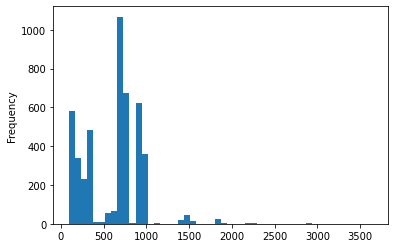

In [71]:
#iii. Plot Histogram on price with bin size 50
items.plot.hist(bins=50)

In [76]:
#iv. No of items price lies between [1000 to 2000]
items[(items>1000) & (items <2000)]

item_name
Chicken Bowl           1400.6802
Chicken Salad Bowl     1856.0250
Steak Burrito          1483.1702
Chicken Burrito        1443.5750
Chicken Bowl           1443.5750
                         ...    
Chicken Bowl           1856.0250
Steak Bowl             1938.5150
Chicken Bowl           1443.5750
Chips and Guacamole    1468.3220
Chicken Salad Bowl     1443.5750
Name: item_price, Length: 116, dtype: float64